<a href="https://colab.research.google.com/github/Leel15/Classification-with-Machine-Learning-Algorithms-Breast-Cancer-Classification/blob/main/Copy_of_Classification_with_Machine_Learning_Algorithms_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Load The Dataset**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

columns = [
    'id', 'diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df = pd.read_csv(url, header=None, names=columns)

# **Data Cleaning**

In [ ]:
# Delete the 'id' column because it is not useful in the learning process
df.drop('id', axis=1, inplace=True)

# Convert categorical values ​​in the diagnosis column to numbers
# (M → 1, B → 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values ​​
print("Missing values:\n", df.isnull().sum())

# Check for duplicate data
print("\nNumber of duplicate rows : ", df.duplicated().sum())

# If exist duplicate rows , Delete it
df.drop_duplicates(inplace=True)

print("\nInformation about data after cleaning\n")
print(df.info())

Missing values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Number of duplicate rows :  0

Information about data after cleaning



# **Data partitioning**

In [ ]:

# Separate features (X) from target variable (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']               # target variable (Malignant → 1, Benign → 0)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData shapes")
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ' , y_train.shape)
print('y_test : ' , y_test.shape)


Data shapes
X_train :  (455, 30)
X_test :  (114, 30)
y_train :  (455,)
y_test :  (114,)




# **Algorithms Import**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix




# **Model Training and Evaluation**

In [ ]:
# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier()
}

# Dictionary to store the results
results = {}

# Loop through each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison")
print(results_df)


Model Performance Comparison
               Accuracy  Precision    Recall  F1 Score
Decision Tree  0.938596   0.926829  0.904762  0.915663
Random Forest  0.973684   1.000000  0.928571  0.962963
SVM            0.903509   1.000000  0.738095  0.849315
k-NN           0.912281   0.970588  0.785714  0.868421




# **Model Performance Visualization and Confusion Matrix**



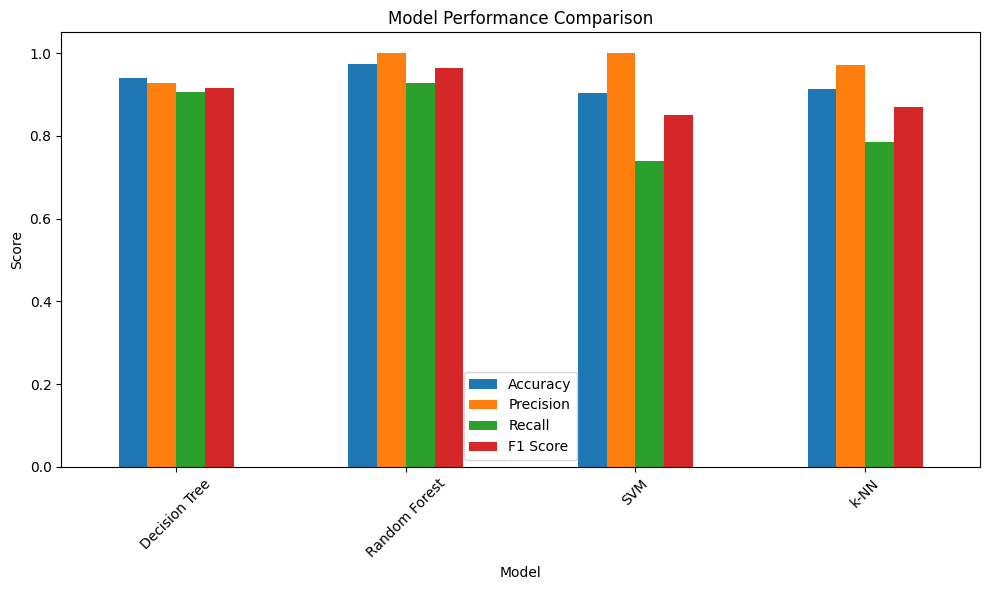

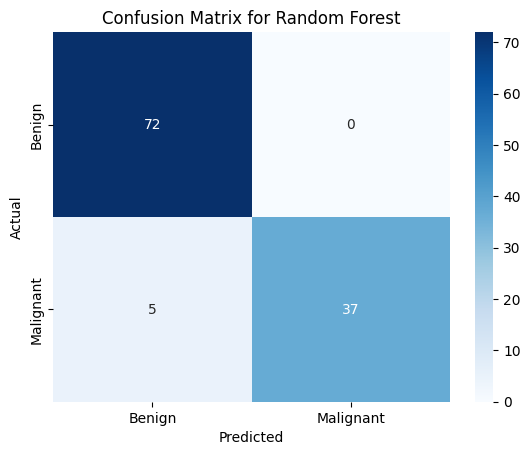

In [ ]:
# Plot the results for comparison
results_df.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Confusion Matrix for the best performing model
best_model_name = results_df['Accuracy'].idxmax()
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title(f"Confusion Matrix for {best_model_name}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
